Translating the R sequences from https://arxiv.org/abs/1611.09477 into Python vtreat https://github.com/WinVector/pyvtreat

R original

Python translation

In [1]:
import pandas
import numpy
import numpy.random
import vtreat # https://github.com/WinVector/pyvtreat
import sklearn.linear_model

freetrade = pandas.read_csv('freetrade.csv')
freetrade.head()

,year,country,tariff,polity,pop,gdp.pc,intresmi,signed,fiveop,usheg
0,1981,SriLanka,NaN,6.0,14988000,461.023590,1.937347,0.0,12.4,0.259311
1,1982,SriLanka,NaN,5.0,15189000,473.763397,1.964430,0.0,12.5,0.255801
2,1983,SriLanka,41.299999,5.0,15417000,489.226562,1.663936,1.0,12.3,0.265502
3,1984,SriLanka,NaN,5.0,15599000,508.173920,2.797462,0.0,12.3,0.298801
4,1985,SriLanka,31.000000,5.0,15837000,525.560852,2.259116,0.0,12.3,0.295243


In [2]:
freetrade.dtypes

year          int64
country      object
tariff      float64
polity      float64
pop           int64
gdp.pc      float64
intresmi    float64
signed      float64
fiveop      float64
usheg       float64
dtype: object

R original

Python version

In [3]:
import seaborn

def compRsq(d, x, y):
    meany = numpy.mean(d[y])
    rsq = 1-numpy.sum((d[y]-d[x])**2)/numpy.sum((d[y]-meany)**2)
    return rsq


def plotFit(d, x, y, title):
    rsq = compRsq(d, x, y)
    title = title + "\nR-squared: " + '{:.3f}'.format(rsq)
    seaborn.scatterplot(x=x, y=y, data=d).set_title(title)

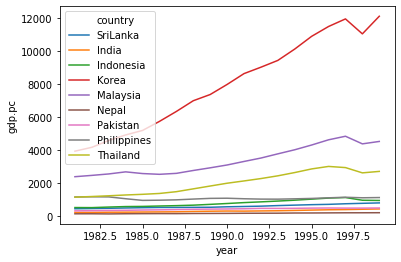

In [4]:
plotFrame =freetrade
sortFrame = plotFrame.loc[plotFrame['year']==1989, ]
seaborn.lineplot(x='year', y='gdp.pc', data=plotFrame, hue='country')

R origninal

Python version

In [5]:
## ----LookFTDefGoal1------------------------------------------------------

In [6]:
trainData = freetrade.loc[freetrade['year']<1990, :].copy()
trainData.reset_index(inplace=True, drop=True)
testData = freetrade.loc[freetrade['year']>=1990, :].copy()
testData.reset_index(inplace=True, drop=True)
origVars = ['tariff', 'polity', 'pop', 'year', 'country']

In [7]:
## ----ModelPast2, echo=FALSE, warning=FALSE, message=FALSE, fig.width=6, fig.height=3----

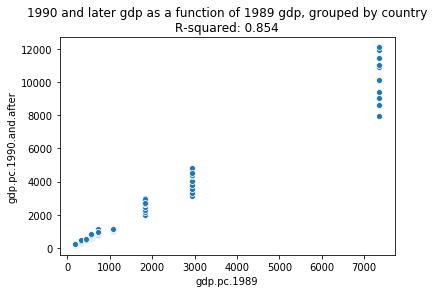

In [8]:
paired = freetrade.loc[freetrade['year']==1989, ['country', 'year', 'gdp.pc']].merge(
               freetrade.loc[freetrade['year']>=1990, ['country', 'year', 'gdp.pc']], 
               on='country', 
               suffixes=['.1989', '.1990.and.after'])
plotFit(paired, 'gdp.pc.1989', 'gdp.pc.1990.and.after', 
                     '1990 and later gdp as a function of 1989 gdp, grouped by country')

R original

Python version

In [9]:
## ----ModelFTTry1, warning=FALSE, message=FALSE, results='hide'-----------

In [10]:
treatments = vtreat.NumericOutcomeTreatment(
    outcome_name='gdp.pc',
    params=vtreat.vtreat_parameters({'filter_to_recommended': False}))
trainTreated = treatments.fit_transform(trainData[origVars + ['gdp.pc']], trainData['gdp.pc'])
scoreFrame = treatments.score_frame_
scoreFrame

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,recommended
0,tariff_is_bad,tariff,missing_indicator,False,True,-0.121769,2.788414e-01,2.0,True
1,polity_is_bad,polity,missing_indicator,False,True,0.217462,5.115870e-02,2.0,True
2,tariff,tariff,clean_copy,False,True,-0.394763,2.653752e-04,4.0,True
3,polity,polity,clean_copy,False,True,-0.010388,9.266652e-01,4.0,False
4,pop,pop,clean_copy,False,True,-0.277180,1.224046e-02,4.0,True
5,year,year,clean_copy,False,True,0.105330,3.493548e-01,4.0,False
6,country_impact_code,country,impact_code,True,True,0.965904,4.017604e-48,1.0,True
7,country_deviance_code,country,deviance_code,True,True,0.907168,1.960773e-31,1.0,True
8,country_prevalence_code,country,prevalence_code,False,False,NaN,1.000000e+00,1.0,False
9,country_lev_Thailand,country,indicator_code,False,True,0.002355,9.833534e-01,9.0,False


In [11]:
trainTreated.head()

,gdp.pc,tariff_is_bad,polity_is_bad,tariff,polity,pop,year,country_impact_code,country_deviance_code,country_lev_Thailand,country_lev_Malaysia,country_lev_Philippines,country_lev_Korea,country_lev_SriLanka,country_lev_India,country_lev_Nepal,country_lev_Pakistan,country_lev_Indonesia
0,461.023590,1.0,0.0,38.608889,6.0,14988000.0,1981.0,-817.607446,28.369214,0,0,0,0,1,0,0,0,0
1,473.763397,1.0,0.0,38.608889,5.0,15189000.0,1982.0,-858.126243,33.127766,0,0,0,0,1,0,0,0,0
2,489.226562,0.0,0.0,41.299999,5.0,15417000.0,1983.0,-1037.009776,36.390210,0,0,0,0,1,0,0,0,0
3,508.173920,1.0,0.0,38.608889,5.0,15599000.0,1984.0,-836.574298,35.544266,0,0,0,0,1,0,0,0,0
4,525.560852,0.0,0.0,31.000000,5.0,15837000.0,1985.0,-1037.009776,36.390210,0,0,0,0,1,0,0,0,0


In [12]:
## ----ModelFTTry1p2, warning=FALSE, message=FALSE-------------------------

In [13]:
modelingVars = [ scoreFrame['variable'][i] for i in range(scoreFrame.shape[0]) if 
                (scoreFrame['recommended'][i] and (not scoreFrame['treatment'][i]=='indicator_code'))]
if not 'year' in set(modelingVars):
    modelingVars = modelingVars + ['year']
print(modelingVars)
trainTreated = trainTreated[modelingVars + ['gdp.pc']].copy()
trainTreated.reset_index(inplace=True, drop=True)
testTreated = treatments.transform(testData)[modelingVars + ['gdp.pc']].copy()
model = sklearn.linear_model.LinearRegression()
testTreated.reset_index(inplace=True, drop=True)
model.fit(trainTreated[modelingVars], trainTreated['gdp.pc'])
testTreated['pred'] = model.predict(testTreated[modelingVars])
testTreated.head()

['tariff_is_bad', 'polity_is_bad', 'tariff', 'pop', 'country_impact_code', 'country_deviance_code', 'year']


,tariff_is_bad,polity_is_bad,tariff,pop,country_impact_code,country_deviance_code,year,gdp.pc,pred
0,0.0,0.0,28.299999,16993000.0,-874.596804,33.342945,1990.0,579.954834,935.456481
1,0.0,0.0,26.900000,17247000.0,-874.596804,33.342945,1991.0,597.698730,1010.218726
2,0.0,0.0,25.000000,17405000.0,-874.596804,33.342945,1992.0,618.332947,1086.436411
3,0.0,0.0,24.200001,17628420.0,-874.596804,33.342945,1993.0,652.620483,1159.447597
4,0.0,0.0,26.000000,17865000.0,-874.596804,33.342945,1994.0,680.040833,1224.875392


In [14]:
## ----ModelFTTry1plot, echo=FALSE, warning=FALSE, message=FALSE, fig.width=6, fig.height=3----

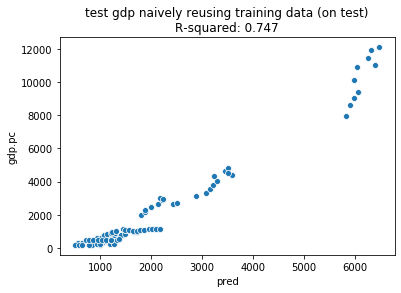

In [15]:
plotFit(testTreated, 'pred', 'gdp.pc', 
        'test gdp naively reusing training data (on test)')

R original

Python version

In [16]:
## ----ModelFTTry3, warning=FALSE, message=FALSE---------------------------

In [17]:
class TimeOrderedSplitter(vtreat.CrossValidationPlan):
    """time oriented cross validation plan"""

    def __init__(self):
        vtreat.CrossValidationPlan.__init__(self)

    def split_plan(self, *, n_rows=None, k_folds=None, data=None, y=None):
       years = [y for y in set(data['year'])]
       years.sort()
       y0 = years[0]
       y1 = years[1]
       splits = [{'train':[i for i in range(data.shape[0]) if data['year'][i]<yr],
                  'app':[i for i in range(data.shape[0]) if data['year'][i]==yr]} for yr in years if yr>y0] +\
                [{'train':[i for i in range(data.shape[0]) if data['year'][i]==y1],
                  'app':[i for i in range(data.shape[0]) if data['year'][i]==y0]}]
       return splits

In [18]:
## ----ModelFTTry3b, warning=FALSE, message=FALSE--------------------------

In [19]:
treatments = vtreat.NumericOutcomeTreatment(
    outcome_name='gdp.pc',
    params=vtreat.vtreat_parameters({'filter_to_recommended': False,
                                     'cross_validation_plan': TimeOrderedSplitter()}))
trainTreated = treatments.fit_transform(trainData[origVars + ['gdp.pc']], trainData['gdp.pc'])
scoreFrame = treatments.score_frame_
modelingVars = [ scoreFrame['variable'][i] for i in range(scoreFrame.shape[0]) if 
                (scoreFrame['recommended'][i] and (not scoreFrame['treatment'][i]=='indicator_code'))]
if not 'year' in set(modelingVars):
    modelingVars = modelingVars + ['year']
print(modelingVars)
trainTreated = trainTreated[modelingVars + ['gdp.pc']].copy()
testTreated = treatments.transform(testData)[modelingVars + ['gdp.pc']].copy()
model = sklearn.linear_model.LinearRegression()
model.fit(trainTreated[modelingVars], trainTreated['gdp.pc'])
testTreated['pred'] = model.predict(testTreated[modelingVars])
testTreated.head()

['tariff_is_bad', 'polity_is_bad', 'tariff', 'pop', 'country_impact_code', 'country_deviance_code', 'year']


,tariff_is_bad,polity_is_bad,tariff,pop,country_impact_code,country_deviance_code,year,gdp.pc,pred
0,0.0,0.0,28.299999,16993000.0,-874.596804,33.342945,1990.0,579.954834,617.717067
1,0.0,0.0,26.900000,17247000.0,-874.596804,33.342945,1991.0,597.698730,630.367664
2,0.0,0.0,25.000000,17405000.0,-874.596804,33.342945,1992.0,618.332947,645.738809
3,0.0,0.0,24.200001,17628420.0,-874.596804,33.342945,1993.0,652.620483,655.150313
4,0.0,0.0,26.000000,17865000.0,-874.596804,33.342945,1994.0,680.040833,650.500217


In [20]:
## ----ModelFTTry3bplot, echo=FALSE, warning=FALSE, message=FALSE, fig.width=6, fig.height=3----

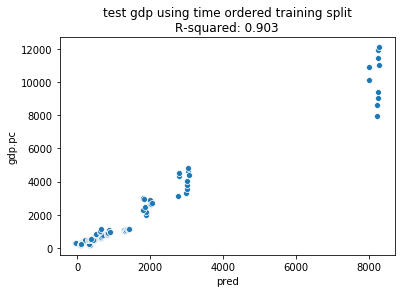

In [21]:
plotFit(testTreated, 'pred', 'gdp.pc', 
        'test gdp using time ordered training split')

In [22]:
scoreFrame

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,recommended
0,tariff_is_bad,tariff,missing_indicator,False,True,-0.121769,2.788414e-01,2.0,True
1,polity_is_bad,polity,missing_indicator,False,True,0.217462,5.115870e-02,2.0,True
2,tariff,tariff,clean_copy,False,True,-0.394763,2.653752e-04,4.0,True
3,polity,polity,clean_copy,False,True,-0.010388,9.266652e-01,4.0,False
4,pop,pop,clean_copy,False,True,-0.277180,1.224046e-02,4.0,True
5,year,year,clean_copy,False,True,0.105330,3.493548e-01,4.0,False
6,country_impact_code,country,impact_code,True,True,0.920697,5.072025e-34,1.0,True
7,country_deviance_code,country,deviance_code,True,True,0.844118,4.338248e-23,1.0,True
8,country_prevalence_code,country,prevalence_code,False,False,NaN,1.000000e+00,1.0,False
9,country_lev_Thailand,country,indicator_code,False,True,0.002355,9.833534e-01,9.0,False
